In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


In [4]:
with open('intents.json') as f:
    data = json.load(f)

In [6]:
tags = []
inputs = []
responses= {}
for intent in data['intents']:
  responses[intent['tag']] = intent['response']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [7]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})
data

,inputs,tags
0,Halo,sapaan
1,Hai,sapaan
2,Hi,sapaan
3,Hey,sapaan
4,Dah,akhir
5,Selamat tinggal,akhir
6,Sampai jumpa,akhir
7,terimakasih,terima kasih
8,terima kasih,terima kasih
9,Namaku $name,Nama


In [8]:
data = data.sample(frac=1)
data

,inputs,tags
24,Kisaran $salary,Penghasilan
20,Menjadi $job,Pekerjaan
10,$name,Nama
23,Berkisar $salary,Penghasilan
14,Aku berusia $age tahun,Umur
17,$experience,Pengalaman
25,Sekitar $salary,Penghasilan
2,Hi,sapaan
7,terimakasih,terima kasih
3,Hey,sapaan


In [9]:
import string

data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
24,kisaran salary,Penghasilan
20,menjadi job,Pekerjaan
10,name,Nama
23,berkisar salary,Penghasilan
14,aku berusia age tahun,Umur
17,experience,Pengalaman
25,sekitar salary,Penghasilan
2,hi,sapaan
7,terimakasih,terima kasih
3,hey,sapaan


In [10]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
x_train = tf.keras.preprocessing.sequence.pad_sequences(train)

In [11]:
#encoding the outputs
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [12]:
input_shape = x_train.shape[1]
print(input_shape)

4


In [13]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  33
output length:  11


In [14]:
from tensorflow.keras.layers import LSTM
model =tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_shape,)),
    tf.keras.layers.Embedding(vocabulary+1,10),
    tf.keras.layers.Bidirectional(LSTM(200,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(50,return_sequences=True)),
    tf.keras.layers.LSTM(25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(output_length,activation="softmax")
])

2022-05-25 13:13:55.722338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-25 13:13:55.722586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [15]:
model.compile(loss="sparse_categorical_crossentropy",
                    optimizer='adam',
                    metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200


2022-05-25 13:13:58.911260: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-25 13:14:01.048361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:01.873818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:01.900474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:02.836483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:02.846665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:03.035119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

1/1 [==============================] - 7s 7s/step - loss: 2.3979 - accuracy: 0.0370
Epoch 2/200
1/1 [==============================] - 0s 54ms/step - loss: 2.3961 - accuracy: 0.2222
Epoch 3/200
1/1 [==============================] - 0s 46ms/step - loss: 2.3942 - accuracy: 0.1481
Epoch 4/200
1/1 [==============================] - 0s 71ms/step - loss: 2.3920 - accuracy: 0.1481
Epoch 5/200
1/1 [==============================] - 0s 48ms/step - loss: 2.3895 - accuracy: 0.1481
Epoch 6/200
1/1 [==============================] - 0s 45ms/step - loss: 2.3865 - accuracy: 0.1481
Epoch 7/200
1/1 [==============================] - 0s 47ms/step - loss: 2.3830 - accuracy: 0.1481
Epoch 8/200
1/1 [==============================] - 0s 43ms/step - loss: 2.3788 - accuracy: 0.1481
Epoch 9/200
1/1 [==============================] - 0s 44ms/step - loss: 2.3736 - accuracy: 0.1481
Epoch 10/200
1/1 [==============================] - 0s 46ms/step - loss: 2.3674 - accuracy: 0.1481
Epoch 11/200
1/1 [===============

Text(0.5, 0, 'epoch')

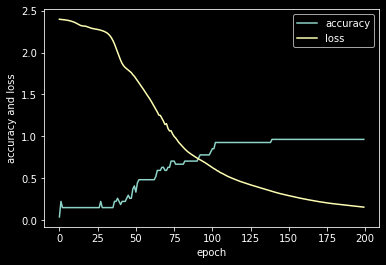

In [16]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["loss"])
plt.ylabel("accuracy and loss")
plt.legend(["accuracy","loss"])
plt.xlabel("epoch")

In [17]:
model.evaluate(x_train,y_train)

2022-05-25 13:14:22.027680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.1519 - accuracy: 0.9630


2022-05-25 13:14:22.251456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:22.259109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:22.298456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:22.305526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:22.345383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:22.352621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-25 13:14:22.391383: I tensorflow/core/grappler/optimizers/cust

[0.15188780426979065, 0.9629629850387573]

In [20]:
model.save('../../model/chatbot_model.h5')
